In [1]:
import torch
import torchaudio
import PIL.Image
from torchvision.transforms.v2 import ToPILImage
from IPython.display import Audio as play
from datasets import load_dataset, Audio
from tft.mdct import mdct, inverse_mdct
from tft.utils import compand, decompand

In [2]:
esc50 = load_dataset("danjacobellis/esc_50",split='train').cast_column('opus', Audio(decode=False))

In [3]:
x, fs = torchaudio.load(esc50[33]['opus']['bytes'],normalize=False);
assert fs==48000; assert x.min() >= -1.0; assert x.max() <= 1.0
n_frames = 448
n_freq = 512
x = x[0,:((n_frames+1)*n_freq)]
assert x.shape[0] == ((n_frames+1)*n_freq)
play(x,rate=fs)

torch.Size([448, 512])


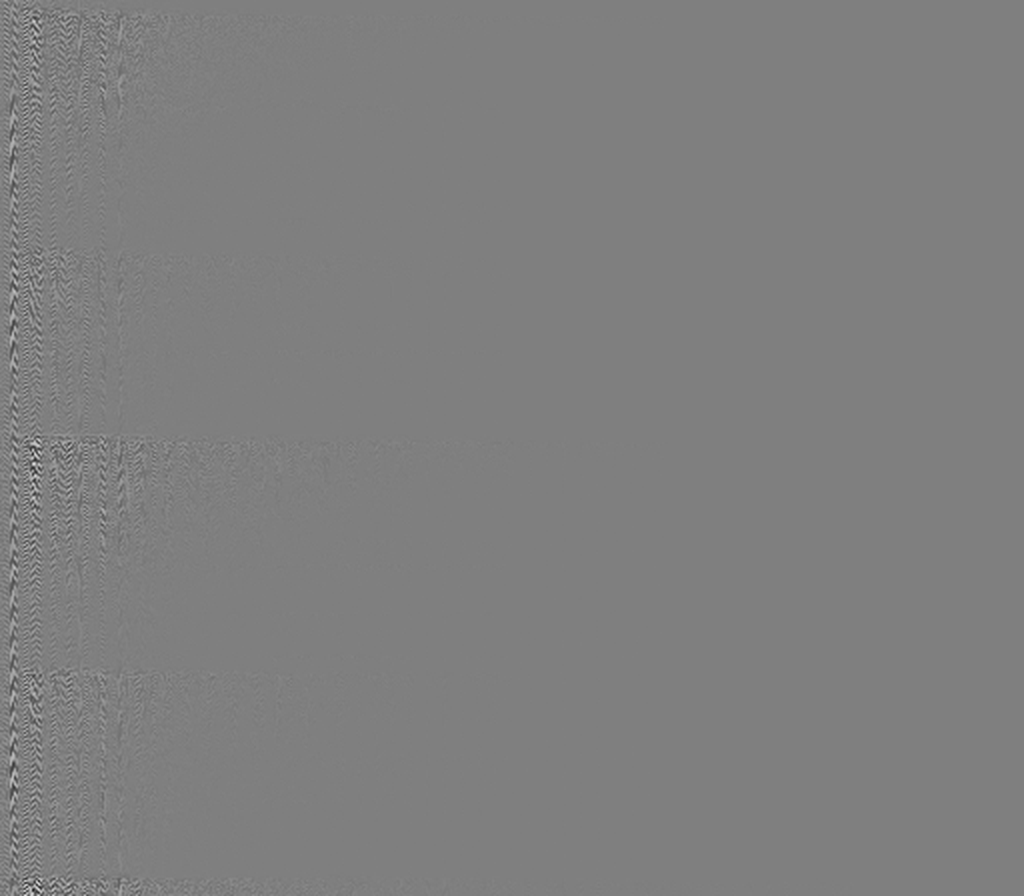

In [4]:
X = compand(mdct(
    signals = x,
    frame_length = 2*n_freq,
))/10
x_hat = inverse_mdct(
    mdcts = decompand(10*X),
)
print(X.shape)
display(play(x_hat,rate=fs))
display(ToPILImage()(X/2 + 0.5).resize((2*X.shape[1],2*X.shape[0]),resample=PIL.Image.Resampling.LANCZOS))